In [ ]:
## CSCI 4150U - Data Mining - Lab 3 (Waveform dataset)
# Name: Thinh Le
# Student ID: 100741899

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import fmean
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [329]:
headers = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'Class']
data = pd.read_csv('./data2/waveform.data', header=None, index_col=None, names=headers)
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13,A14,A15,A16,A17,A18,A19,A20,A21,Class
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.65,0.69,2.29,-0.16,0.51,0.26,2.34,-0.42,0.49,0.31,...,3.46,4.81,5.49,5.19,3.10,3.86,2.96,1.09,-1.42,0
4996,-0.02,0.67,2.34,3.18,2.16,4.77,6.70,4.54,4.92,3.39,...,1.53,2.52,1.14,-1.56,-1.18,-0.56,0.02,-1.05,-0.18,1
4997,0.01,-1.99,0.16,2.30,-0.53,1.93,3.61,3.00,4.61,5.73,...,3.14,3.04,1.61,0.60,-0.52,0.62,1.00,1.21,-0.27,1
4998,-0.40,0.41,-0.48,1.04,0.79,-0.66,1.18,0.52,2.20,0.59,...,3.64,3.62,5.97,2.63,3.83,1.72,2.08,1.31,1.37,0


In [330]:
Y = data['Class']
X = data.drop(columns=['Class'])

In [331]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)

In [332]:
# Using Holdout
accuracy = []
precision = []
fmeasure = []
for i in range(5):
    # Split the dataset into training set and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    # Train the model
    clf = clf.fit(X_train, Y_train)
    # Test the model
    Y_pred = clf.predict(X_test)
    # Calculate accuracY, precision, and f-measure
    accuracy.append(accuracy_score(Y_test, Y_pred))
    precision.append(precision_score(Y_test, Y_pred, average='macro'))
    fmeasure.append(f1_score(Y_test, Y_pred, average='macro'))
# Calculate average accuracY, precision, and f-measure
print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('F-measure: ' + str(fmeasure))
print('Avg. Accuracy: ' + str(fmean(accuracy)))
print('Avg. Precision: ' + str(fmean(precision)))
print('Avg. F-measure: ' + str(fmean(fmeasure)))
# Display statistics in table
index = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
accuracy.append(fmean(accuracy))
precision.append(fmean(precision))
fmeasure.append(fmean(fmeasure))
table_data = {'Accuracy': accuracy, 'Precision': precision, 'F-measure': fmeasure}
table = pd.DataFrame(table_data, index=index)
table

Accuracy: [0.73, 0.73, 0.71, 0.708, 0.72]
Precision: [0.7408079875536409, 0.7464341681842311, 0.7224554702102143, 0.7233715661285754, 0.7381590136054422]
F-measure: [0.7217185702034187, 0.7190184334878912, 0.7027172807600041, 0.7022485331943319, 0.7096857837143146]
Avg. Accuracy: 0.7196
Avg. Precision: 0.7342456411364208
Avg. F-measure: 0.711077720271992


,Accuracy,Precision,F-measure
#1,0.7300,0.740808,0.721719
#2,0.7300,0.746434,0.719018
#3,0.7100,0.722455,0.702717
#4,0.7080,0.723372,0.702249
#5,0.7200,0.738159,0.709686
Avg.,0.7196,0.734246,0.711078


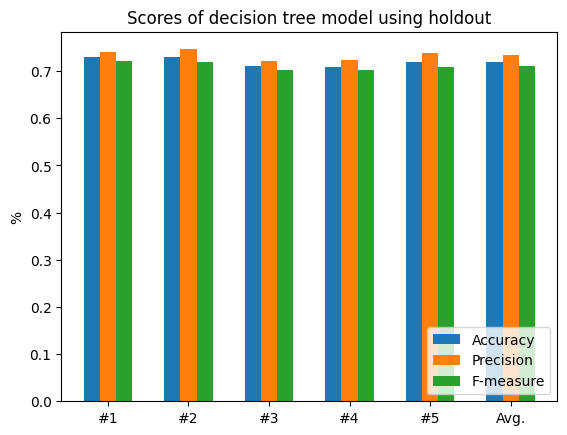

In [333]:
# Display statistics in bar chart
labels = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, accuracy, width/3, label='Accuracy')
rects2 = ax.bar(x, precision, width/3, label='Precision')
rects3 = ax.bar(x + width/3, fmeasure, width/3, label='F-measure')
ax.set_ylabel('%')
ax.set_title('Scores of decision tree model using holdout')
ax.set_xticks(x, labels)
plt.legend(loc='lower right')
plt.show()

In [334]:
# Using cross-validation
scoring = ['accuracy', 'precision_macro', 'f1_macro']
scores = cross_validate(clf, X, Y, cv=10, scoring=scoring, return_train_score=False)
print('Accuracy: ' + str(scores['test_accuracy']))
print('Precision: ' + str(scores['test_precision_macro']))
print('F-measure: ' + str(scores['test_f1_macro']))
print('Avg Accuracy: ' + str(scores['test_accuracy'].mean()))
print('Avg Precision: ' + str(scores['test_precision_macro'].mean()))
print('Avg F-measure: ' + str(scores['test_f1_macro'].mean()))
# Display statistics in table
index = ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10', 'Avg.']
accuracy = np.append(scores['test_accuracy'], scores['test_accuracy'].mean())
precision = np.append(scores['test_precision_macro'], scores['test_precision_macro'].mean())
fmeasure = np.append(scores['test_f1_macro'], scores['test_f1_macro'].mean())
table_data = {'Accuracy': accuracy, 'Precision': precision, 'F-measure': fmeasure}
table = pd.DataFrame(table_data, index=index)
table

Accuracy: [0.706 0.714 0.728 0.724 0.702 0.706 0.718 0.734 0.704 0.674]
Precision: [0.71868635 0.72283877 0.7327038  0.72680803 0.72885572 0.71416875
 0.72519648 0.76167662 0.71793566 0.68026316]
F-measure: [0.69630286 0.70701383 0.72536627 0.71819081 0.6916543  0.69776654
 0.71391302 0.72301042 0.69261191 0.66968619]
Avg Accuracy: 0.711
Avg Precision: 0.7229133353290986
Avg F-measure: 0.703551615264054


,Accuracy,Precision,F-measure
#1,0.706,0.718686,0.696303
#2,0.714,0.722839,0.707014
#3,0.728,0.732704,0.725366
#4,0.724,0.726808,0.718191
#5,0.702,0.728856,0.691654
#6,0.706,0.714169,0.697767
#7,0.718,0.725196,0.713913
#8,0.734,0.761677,0.723010
#9,0.704,0.717936,0.692612
#10,0.674,0.680263,0.669686


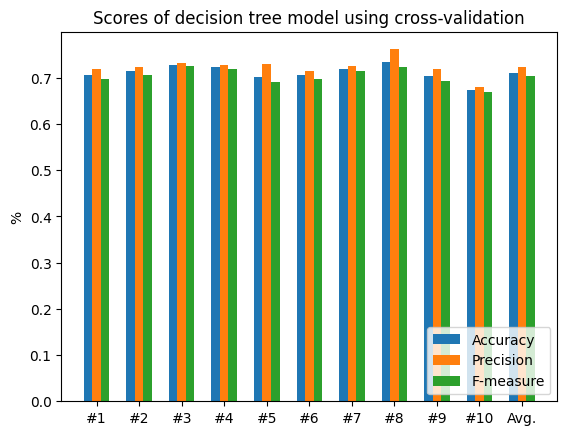

In [335]:
# Display statistics in bar chart
labels = ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, accuracy, width/3, label='Accuracy')
rects2 = ax.bar(x, precision, width/3, label='Precision')
rects3 = ax.bar(x + width/3, fmeasure, width/3, label='F-measure')
ax.set_ylabel('%')
ax.set_title('Scores of decision tree model using cross-validation')
ax.set_xticks(x, labels)
plt.legend(loc='lower right')
plt.show()

In [336]:
accuracy_1 = accuracy

In [337]:
# Select the EntropY as the impuritY measure
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [338]:
# Using Holdout
accuracy = []
precision = []
fmeasure = []
for i in range(5):
    # Split the dataset into training set and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    # Train the model
    clf = clf.fit(X_train, Y_train)
    # Test the model
    Y_pred = clf.predict(X_test)
    # Calculate accuracY, precision, and f-measure
    accuracy.append(accuracy_score(Y_test, Y_pred))
    precision.append(precision_score(Y_test, Y_pred, average='macro'))
    fmeasure.append(f1_score(Y_test, Y_pred, average='macro'))
# Calculate average accuracY, precision, and f-measure
print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('F-measure: ' + str(fmeasure))
print('Avg. Accuracy: ' + str(fmean(accuracy)))
print('Avg. Precision: ' + str(fmean(precision)))
print('Avg. F-measure: ' + str(fmean(fmeasure)))
# Display statistics in table
index = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
accuracy.append(fmean(accuracy))
precision.append(fmean(precision))
fmeasure.append(fmean(fmeasure))
table_data = {'Accuracy': accuracy, 'Precision': precision, 'F-measure': fmeasure}
table = pd.DataFrame(table_data, index=index)
table

Accuracy: [0.692, 0.684, 0.706, 0.672, 0.656]
Precision: [0.7162037037037038, 0.6913901174238909, 0.7081026481026481, 0.7053583101323001, 0.7000703761055229]
F-measure: [0.6708997016119563, 0.6843662976038002, 0.7065043083265512, 0.6537491113083098, 0.6327044435740088]
Avg. Accuracy: 0.682
Avg. Precision: 0.7042250310936131
Avg. F-measure: 0.6696447724849253


,Accuracy,Precision,F-measure
#1,0.692,0.716204,0.670900
#2,0.684,0.691390,0.684366
#3,0.706,0.708103,0.706504
#4,0.672,0.705358,0.653749
#5,0.656,0.700070,0.632704
Avg.,0.682,0.704225,0.669645


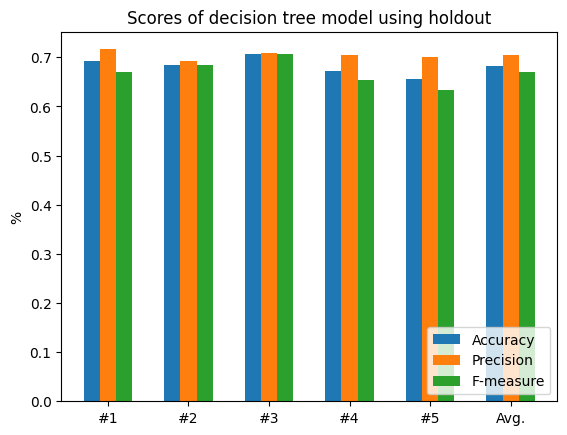

In [339]:
# Display statistics in bar chart
labels = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, accuracy, width/3, label='Accuracy')
rects2 = ax.bar(x, precision, width/3, label='Precision')
rects3 = ax.bar(x + width/3, fmeasure, width/3, label='F-measure')
ax.set_ylabel('%')
ax.set_title('Scores of decision tree model using holdout')
ax.set_xticks(x, labels)
plt.legend(loc='lower right')
plt.show()

In [340]:
# Using cross-validation
scoring = ['accuracy', 'precision_macro', 'f1_macro']
scores = cross_validate(clf, X, Y, cv=10, scoring=scoring, return_train_score=False)
print('Accuracy: ' + str(scores['test_accuracy']))
print('Precision: ' + str(scores['test_precision_macro']))
print('F-measure: ' + str(scores['test_f1_macro']))
print('Avg Accuracy: ' + str(scores['test_accuracy'].mean()))
print('Avg Precision: ' + str(scores['test_precision_macro'].mean()))
print('Avg F-measure: ' + str(scores['test_f1_macro'].mean()))
# Display statistics in table
index = ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10', 'Avg.']
accuracy = np.append(scores['test_accuracy'], scores['test_accuracy'].mean())
precision = np.append(scores['test_precision_macro'], scores['test_precision_macro'].mean())
fmeasure = np.append(scores['test_f1_macro'], scores['test_f1_macro'].mean())
table_data = {'Accuracy': accuracy, 'Precision': precision, 'F-measure': fmeasure}
table = pd.DataFrame(table_data, index=index)
table

Accuracy: [0.7   0.664 0.662 0.692 0.672 0.684 0.68  0.682 0.68  0.67 ]
Precision: [0.73364192 0.72238097 0.69891295 0.70562339 0.68061597 0.68690168
 0.70341034 0.70065993 0.68427261 0.67485261]
F-measure: [0.68712871 0.64704767 0.64171542 0.68557999 0.6695002  0.68335502
 0.66465468 0.6680193  0.67866387 0.66908307]
Avg Accuracy: 0.6786
Avg Precision: 0.6991272382738544
Avg F-measure: 0.6694747941765823


,Accuracy,Precision,F-measure
#1,0.7000,0.733642,0.687129
#2,0.6640,0.722381,0.647048
#3,0.6620,0.698913,0.641715
#4,0.6920,0.705623,0.685580
#5,0.6720,0.680616,0.669500
#6,0.6840,0.686902,0.683355
#7,0.6800,0.703410,0.664655
#8,0.6820,0.700660,0.668019
#9,0.6800,0.684273,0.678664
#10,0.6700,0.674853,0.669083


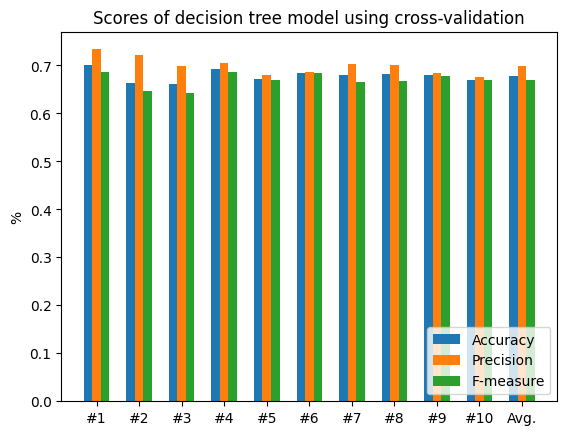

In [341]:
# Display statistics in bar chart
labels = ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, accuracy, width/3, label='Accuracy')
rects2 = ax.bar(x, precision, width/3, label='Precision')
rects3 = ax.bar(x + width/3, fmeasure, width/3, label='F-measure')
ax.set_ylabel('%')
ax.set_title('Scores of decision tree model using cross-validation')
ax.set_xticks(x, labels)
plt.legend(loc='lower right')
plt.show()

In [342]:
accuracy_2 = accuracy

In [343]:
# Compare the final accuracy of cross-validation of Part I and II
table_data = {'Using Gini': accuracy_1, 'Using Entropy': accuracy_2}
table = pd.DataFrame(table_data, index=index)
table

,Using Gini,Using Entropy
#1,0.706,0.7000
#2,0.714,0.6640
#3,0.728,0.6620
#4,0.724,0.6920
#5,0.702,0.6720
#6,0.706,0.6840
#7,0.718,0.6800
#8,0.734,0.6820
#9,0.704,0.6800
#10,0.674,0.6700


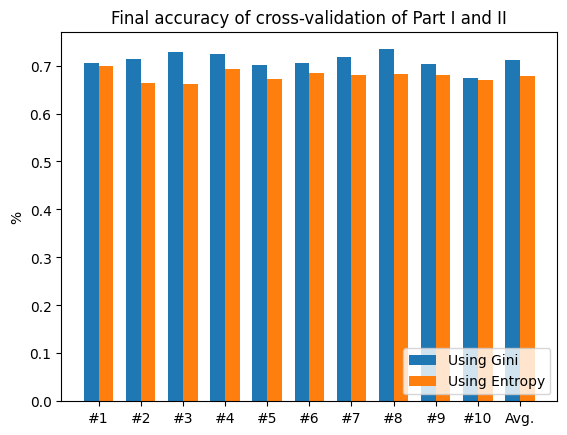

In [344]:
# Compare the final accuracy of cross-validation of Part I and II
labels = ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_1, width, label='Using Gini')
rects3 = ax.bar(x + width/2, accuracy_2, width, label='Using Entropy')
ax.set_ylabel('%')
ax.set_title('Final accuracy of cross-validation of Part I and II')
ax.set_xticks(x, labels)
plt.legend(loc='lower right')
plt.show()

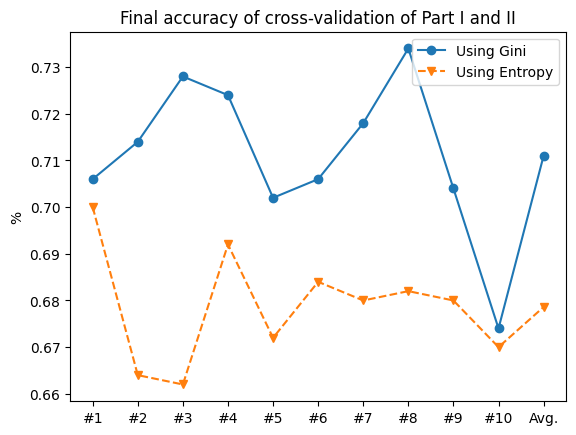

In [345]:
# Compare the final accuracy of cross-validation of Part I and II
plt.plot(labels, accuracy_1, 'o-', labels, accuracy_2, 'v--')
plt.ylabel('%')
plt.title('Final accuracy of cross-validation of Part I and II')
plt.legend(['Using Gini', 'Using Entropy'], loc='upper right')
plt.show()

In [346]:
# There is a noticeable difference between the 2 impurity measures.
# Using Gini has considerably higher accuracy than using Entropy
#   in every run, and the average is differ by around 0.4 (4%).

Text(0, 0.5, 'Accuracy')

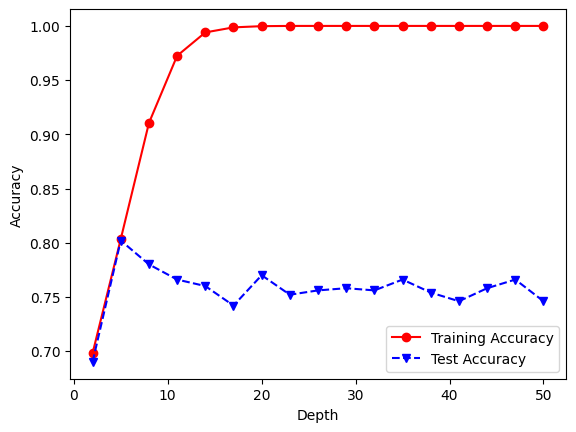

In [359]:
depths = []
for i in range(2, 51, 3):
    depths.append(i)
trainAcc = np.zeros(len(depths))
testAcc = np.zeros(len(depths))
# Split the dataset into training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
index = 0
for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_pred_train = clf.predict(X_train)
    Y_pred_test = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_pred_train)
    testAcc[index] = accuracy_score(Y_test, Y_pred_test)
    index += 1
plt.plot(depths, trainAcc, 'ro-', depths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Depth')
plt.ylabel('Accuracy')

In [348]:
# The plot above shows that training accuracy will continue to improve
#   as the maximum depth of the tree increases (the model becomes more complex).
# However, the testing accuracy initially improves up to a maximum depth of 5, 
#   before it accuracy gradually decreases due to model overfitting.